In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.optimize import lsq_linear
import sys
sys.path.append("..")
from BinaryTree import *

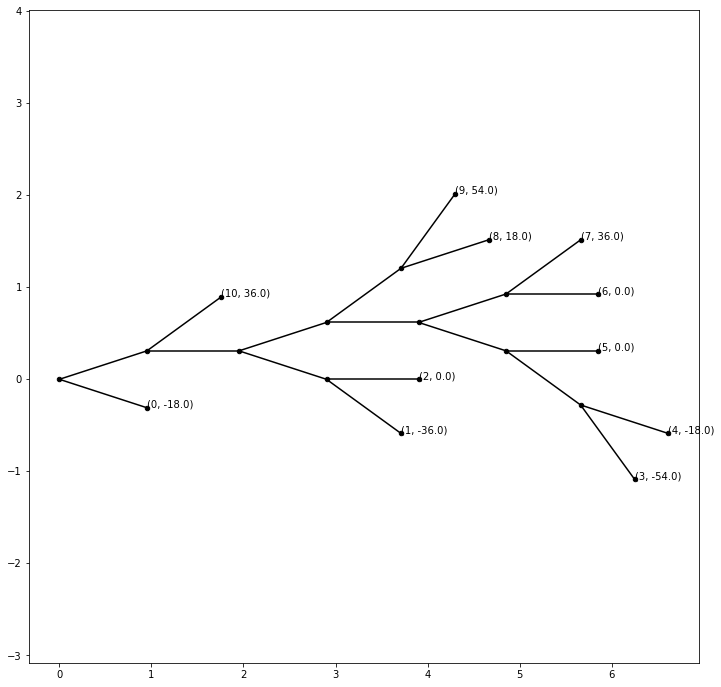

In [2]:
plt.figure(figsize=(12, 12))
N = 10
ws = enumerate_weightsequences(N)
w = ws[len(ws)//2]
T = weightsequence_to_binarytree(w)
T.draw()

In [3]:
eqs = T.get_angle_equations()

n_leaves =  11


In [4]:
I = np.array([], dtype=int)
J = np.array([], dtype=int)
V = np.array([])
b = []
for row, eq in eqs.items():
    eq, val = eq[0:-1], eq[-1]
    b.append(val)
    eq = np.array(eq)
    J = np.concatenate((J, eq[:, 0]))
    V = np.concatenate((V, eq[:, 1]))
    I = np.concatenate((I, [row]*eq.shape[0]))
A = sparse.coo_matrix((V, (I, J)), shape=(len(eqs), np.max(J)+1))
A = A.toarray()
b = np.array(b)
print(b*180/np.pi)
print("A.shape", A.shape)
print("b.shape", b.shape)

[  0.          32.72727273  65.45454545  98.18181818 130.90909091
 163.63636364 196.36363636 229.09090909 261.81818182 294.54545455
 327.27272727]
A.shape (11, 20)
b.shape (11,)


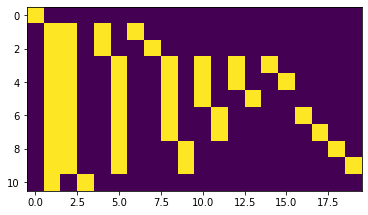

In [5]:
plt.imshow(A)

[  0.   156.89 -13.48 170.38 -62.88  49.4  -47.8  -15.08  -7.52  56.91
 -25.81  18.29 -29.96   4.15 -31.34   1.38  -7.22  25.51  12.09  44.82]


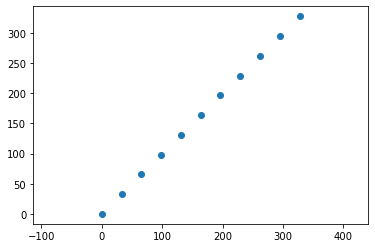

In [6]:
res = lsq_linear(A, b, (-np.pi, np.pi))
print(np.round(res['x']*100*180/np.pi)/100)
plt.scatter(A.dot(res['x'])*180/np.pi, b*180/np.pi)
plt.axis("equal");

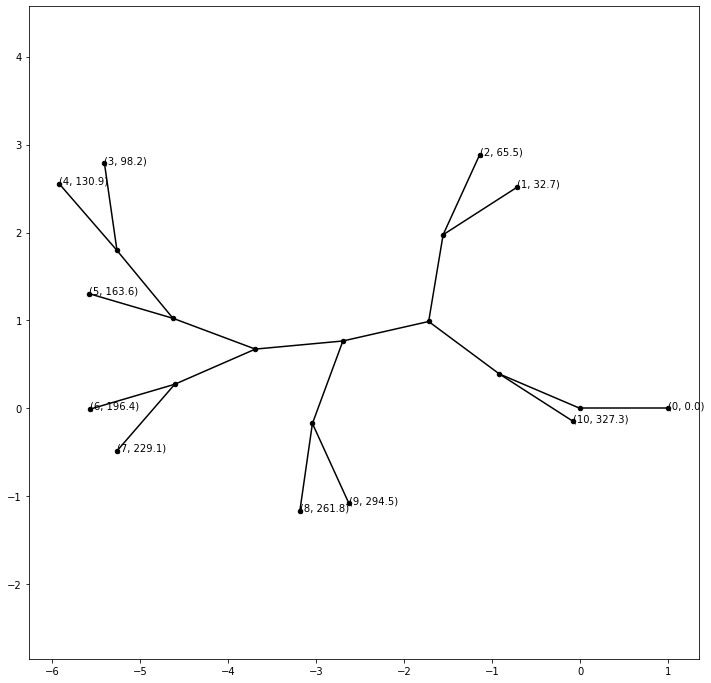

In [7]:
plt.figure(figsize=(12, 12))
T.set_angles(res['x'])
T.draw()
plt.